# Tannis McCartney
## June 21, 2022
## Exploratory Visual Analysis - NS Housing Indicators

### Table of Contents
01 Import Libraries

02 Import Dataset

03 Create subsets for correlation analysis

04 Correlation analysis

05 Scatterplots for variables with strongest correlations

06 Pair plots

07 Categorical plots

08 Discussion

# 01 Import libraries

In [1]:
# Import libraries for analysis
import pandas as pd
import numpy as np
import os

In [2]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02 Import data

In [3]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\6 Advanced Analytics and Dashboard Design\Nova Scotia Housing and Income'  

In [4]:
# Import NS housing market indicators
NSHousing = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'NSHousing_cleaned.pkl'))
NSHousing.head()

indicator,total_starts,single_detached_starts,multiple_starts,semi_detached_starts,row_starts,apartment_starts,starts_by_market,freehold_homeownership_starts,rental_starts,condominium_ownership_starts,...,bachelor_average_rent_dollars,one_bedroom_average_rent,two_bed_average_rent_dollars,three_plus_bed_average_rent_dollars,july_1_population_thousands,labour_force_participation_rate_percent,pct_change_employment,pct_change_unemployment,pct_change_real_disposable_income,net_migration
1990,5560.0,3639.0,1921.0,310.0,100.0,1511.0,3650.0,2199.0,1107.0,12.0,...,391.0,460.0,539.0,658.0,910.500000,61.900002,1.0,10.7,NaN,NaN
1991,5173.0,2604.0,2569.0,301.0,46.0,2222.0,3681.0,1590.0,1691.0,0.0,...,408.0,481.0,565.0,690.0,915.000000,61.500000,-1.2,12.1,-1.5,NaN
1992,4673.0,3232.0,1441.0,373.0,93.0,975.0,3222.0,2190.0,764.0,0.0,...,409.0,475.0,562.0,687.0,919.500000,60.000000,-3.1,13.1,2.3,1217.0
1993,4282.0,3126.0,1156.0,496.0,81.0,579.0,2988.0,2306.0,642.0,0.0,...,412.0,482.0,571.0,719.0,923.900024,60.099998,-0.6,14.3,2.1,1676.0
1994,4748.0,3358.0,1390.0,518.0,99.0,773.0,3304.0,2493.0,671.0,0.0,...,421.0,485.0,579.0,711.0,926.900024,60.099998,1.7,13.5,-0.8,409.0


In [19]:
# Export subset to csv
NSHousing.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'NS_hmi_cleaned.csv'))

# 03 Create subsets for correlation analysis

In [5]:
# Select columns from NSHousing for correlation analysis
df = NSHousing[['total_starts', 'total_completions', 'residential_building_permits', 'new_completed_and_unabsorbed_home_supply', 'single_and_semi_detached_supply', 'row_and_apartment_supply', 'rental_vacancy_percent', 'standard_space_seniors_vacancy_rate', 'pct_change_new_housing_price_index', 'pct_change_consumer_price_index', 'pct_change_owned_accommodation_costs', 'pct_change_rental_accommodation_costs', 'july_1_population_thousands', 'pct_change_real_disposable_income', 'net_migration']]
df.head()

indicator,total_starts,total_completions,residential_building_permits,new_completed_and_unabsorbed_home_supply,single_and_semi_detached_supply,row_and_apartment_supply,rental_vacancy_percent,standard_space_seniors_vacancy_rate,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_real_disposable_income,net_migration
1990,5560.0,5477.0,6323.0,NaN,NaN,NaN,3.8,NaN,0.3,5.1,4.7,3.3,910.500000,NaN,NaN
1991,5173.0,4905.0,5542.0,NaN,NaN,NaN,5.1,NaN,-0.2,6.1,4.5,2.8,915.000000,-1.5,NaN
1992,4673.0,5485.0,5217.0,120.0,48.0,72.0,5.7,NaN,1.1,0.7,-0.8,1.9,919.500000,2.3,1217.0
1993,4282.0,4545.0,4938.0,134.0,76.0,58.0,6.0,NaN,3.0,1.2,-0.5,1.3,923.900024,2.1,1676.0
1994,4748.0,4920.0,5018.0,213.0,146.0,67.0,6.7,NaN,2.8,1.1,-0.3,1.3,926.900024,-0.8,409.0


In [6]:
# Check shape of subset
df.shape

(27, 15)

# 04 Correlation analysis

In [8]:
# Create a correlation matrix for the NSHousing data
df.corr()

indicator,total_starts,total_completions,residential_building_permits,new_completed_and_unabsorbed_home_supply,single_and_semi_detached_supply,row_and_apartment_supply,rental_vacancy_percent,standard_space_seniors_vacancy_rate,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_real_disposable_income,net_migration
indicator,,,,,,,,,,,,,,,
total_starts,1.000000,0.725508,0.802450,-0.192202,-0.358199,0.140276,-0.212153,0.159420,0.241520,0.658814,0.342633,0.550030,-0.445256,-0.310391,-0.139406
total_completions,0.725508,1.000000,0.604820,-0.028643,-0.239041,0.219363,0.012884,0.157691,0.287595,0.380997,0.204009,0.495900,-0.590540,-0.172015,-0.203607
residential_building_permits,0.802450,0.604820,1.000000,-0.006139,-0.087771,0.086072,0.126967,0.257256,-0.031507,0.504773,0.099228,0.405118,-0.509812,-0.328708,-0.040410
new_completed_and_unabsorbed_home_supply,-0.192202,-0.028643,-0.006139,1.000000,0.643288,0.574653,0.563647,0.203833,-0.049107,-0.229404,-0.089560,-0.291285,-0.207192,-0.140368,-0.147620
single_and_semi_detached_supply,-0.358199,-0.239041,-0.087771,0.643288,1.000000,-0.256917,0.790375,-0.153769,-0.444553,-0.200587,-0.367336,-0.240481,-0.221785,-0.382361,-0.101889
row_and_apartment_supply,0.140276,0.219363,0.086072,0.574653,-0.256917,1.000000,-0.133373,0.418270,0.413208,-0.075160,0.279606,-0.110627,-0.024462,0.231396,-0.077426
rental_vacancy_percent,-0.212153,0.012884,0.126967,0.563647,0.790375,-0.133373,1.000000,-0.221801,-0.363532,-0.185044,-0.476104,-0.046228,-0.473412,-0.400017,-0.092693
standard_space_seniors_vacancy_rate,0.159420,0.157691,0.257256,0.203833,-0.153769,0.418270,-0.221801,1.000000,-0.216261,0.282082,-0.563147,0.148584,-0.196360,0.150470,0.248429
pct_change_new_housing_price_index,0.241520,0.287595,-0.031507,-0.049107,-0.444553,0.413208,-0.363532,-0.216261,1.000000,0.030484,0.487089,-0.293955,0.123988,0.259001,-0.321795


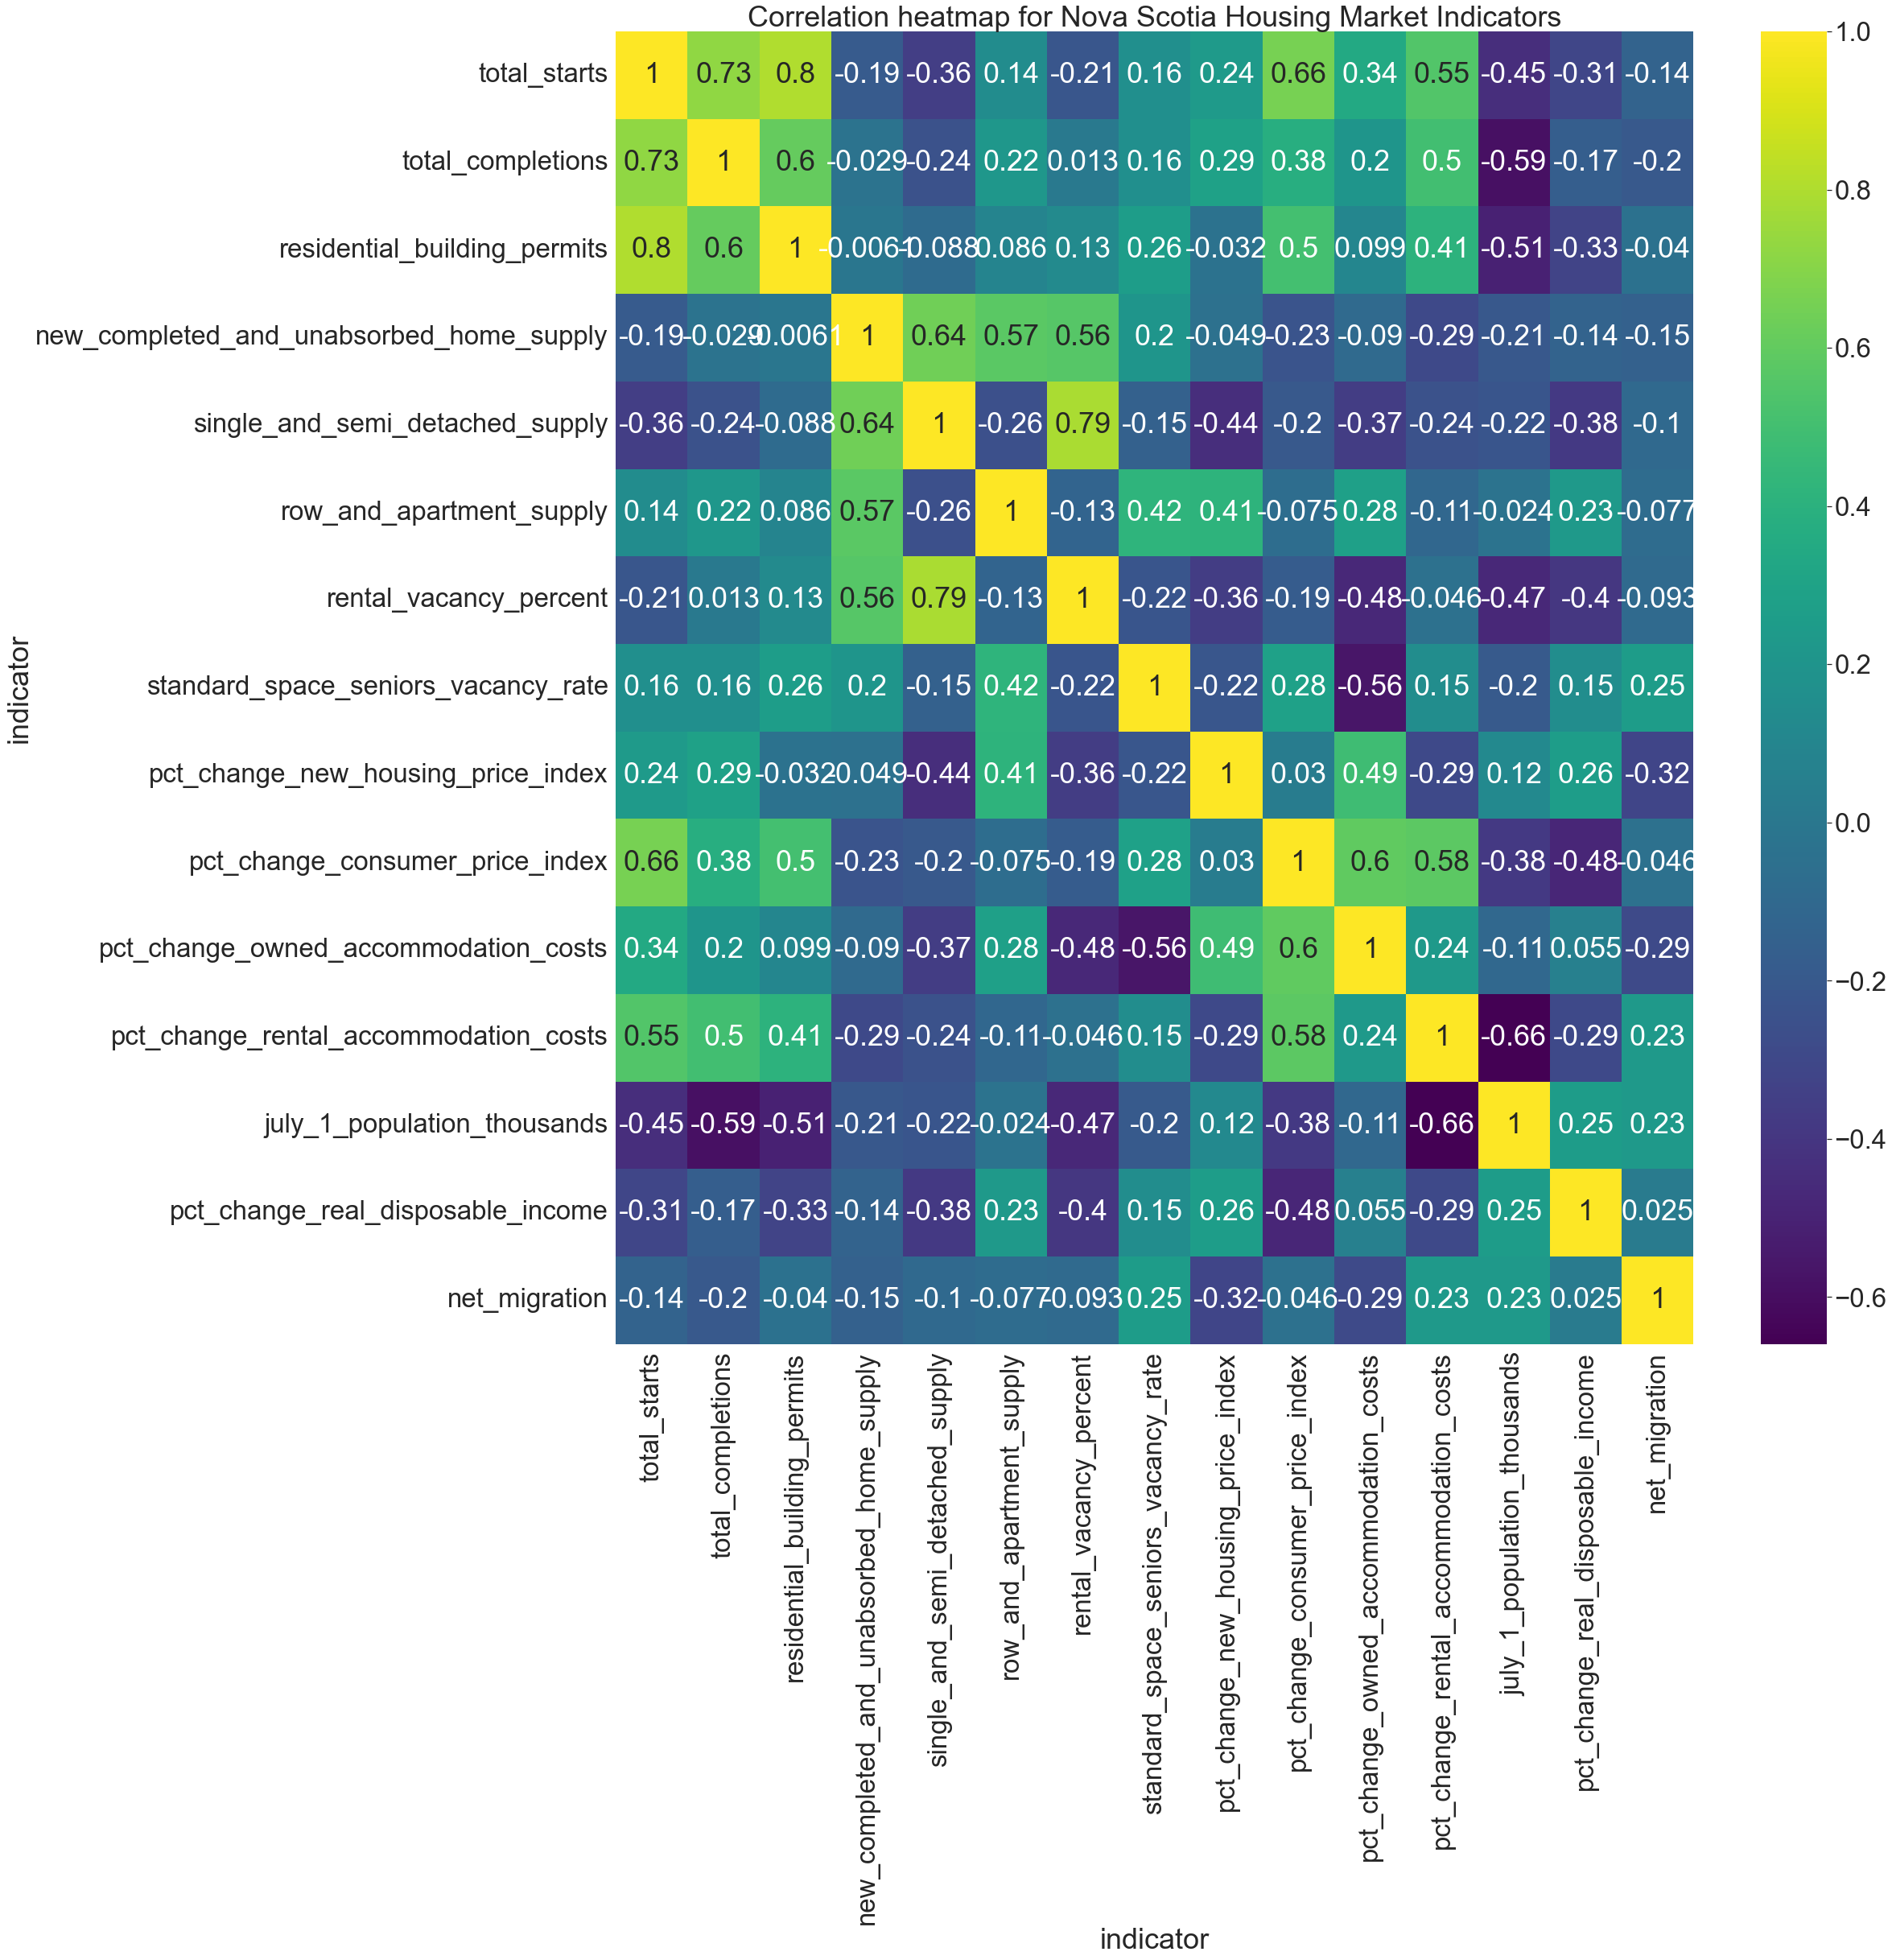

In [9]:
# Create a seaborn heatmap for the NSHousing data
plt.figure(figsize=(30,30))
sns.set(font_scale=3)
heatmapNS = sns.heatmap(df.corr(),
                      annot=True,
                      cmap='viridis'
                     )
heatmapNS.set_title('Correlation heatmap for Nova Scotia Housing Market Indicators');

The yellow colours, with coefficient = 1, represent the correlation of a variable with itself. 

The strongest relationships (coefficients > 0.5) are between total_starts, total_completions, and residential_building_permits. This makes sense, since these variables represent three stages of construction.

A strong relationship exists between single_and_semi_detached_supply and rental_vacancy_percent.

Construction and vacancy rates are weakly correlated with population, net migration, and disposable income. Does this weak correlation hint to the developing housing crisis?

There are strong relationship between total_starts, pct_change_consumer_price_index and percent change in both rental and owned accommodation costs.

It seems like housing supply only correlates with other factors related to housing supply, but not to the factors that influence whether people can afford housing. Is there a lag? If not, this is probably a contributor to the housing crisis.

What should have strong correlations to prevent a housing crisis?

# 05 Scatterplots for variables with strongest correlations

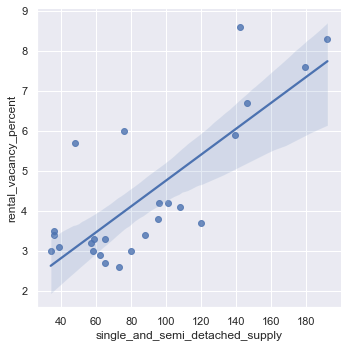

In [10]:
# Create a scatterplot for single_and_semi_detached_supply and rental_vacancy_percent
sns.set(font_scale=1)
sns.lmplot(x = 'single_and_semi_detached_supply', y = 'rental_vacancy_percent', data = df)

Although there are some outliers, there is definitely a linear relationship between single_and_semi_detached_supply and rental_vacancy_percent. One possible explanation is that as supply increases, people move out of rental accommodations into the new housing supply, freeing up more rentals.

This explains the current Nova Scotia government's focus on housing supply to address the housing crisis, however this doesn't tell the whole story, because at current rental and home ownership rates, renters can't afford to buy homes, no matter what the supply is.

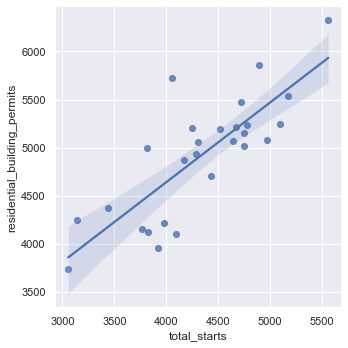

In [11]:
# Create a scatterplot for total_starts and residential_building_permits

sns.lmplot(x = 'total_starts', y = 'residential_building_permits', data = df)

As expected by the requirement that new housing starts have residential building permits, these two variables have a linear relationship. 

It would be fun to find out what causes the outliers, because I think this correlation should actually be stronger, unless there are delays beginning construction. 

Could these outliers be related to skilled labour shortages?

# 06 Pair plots

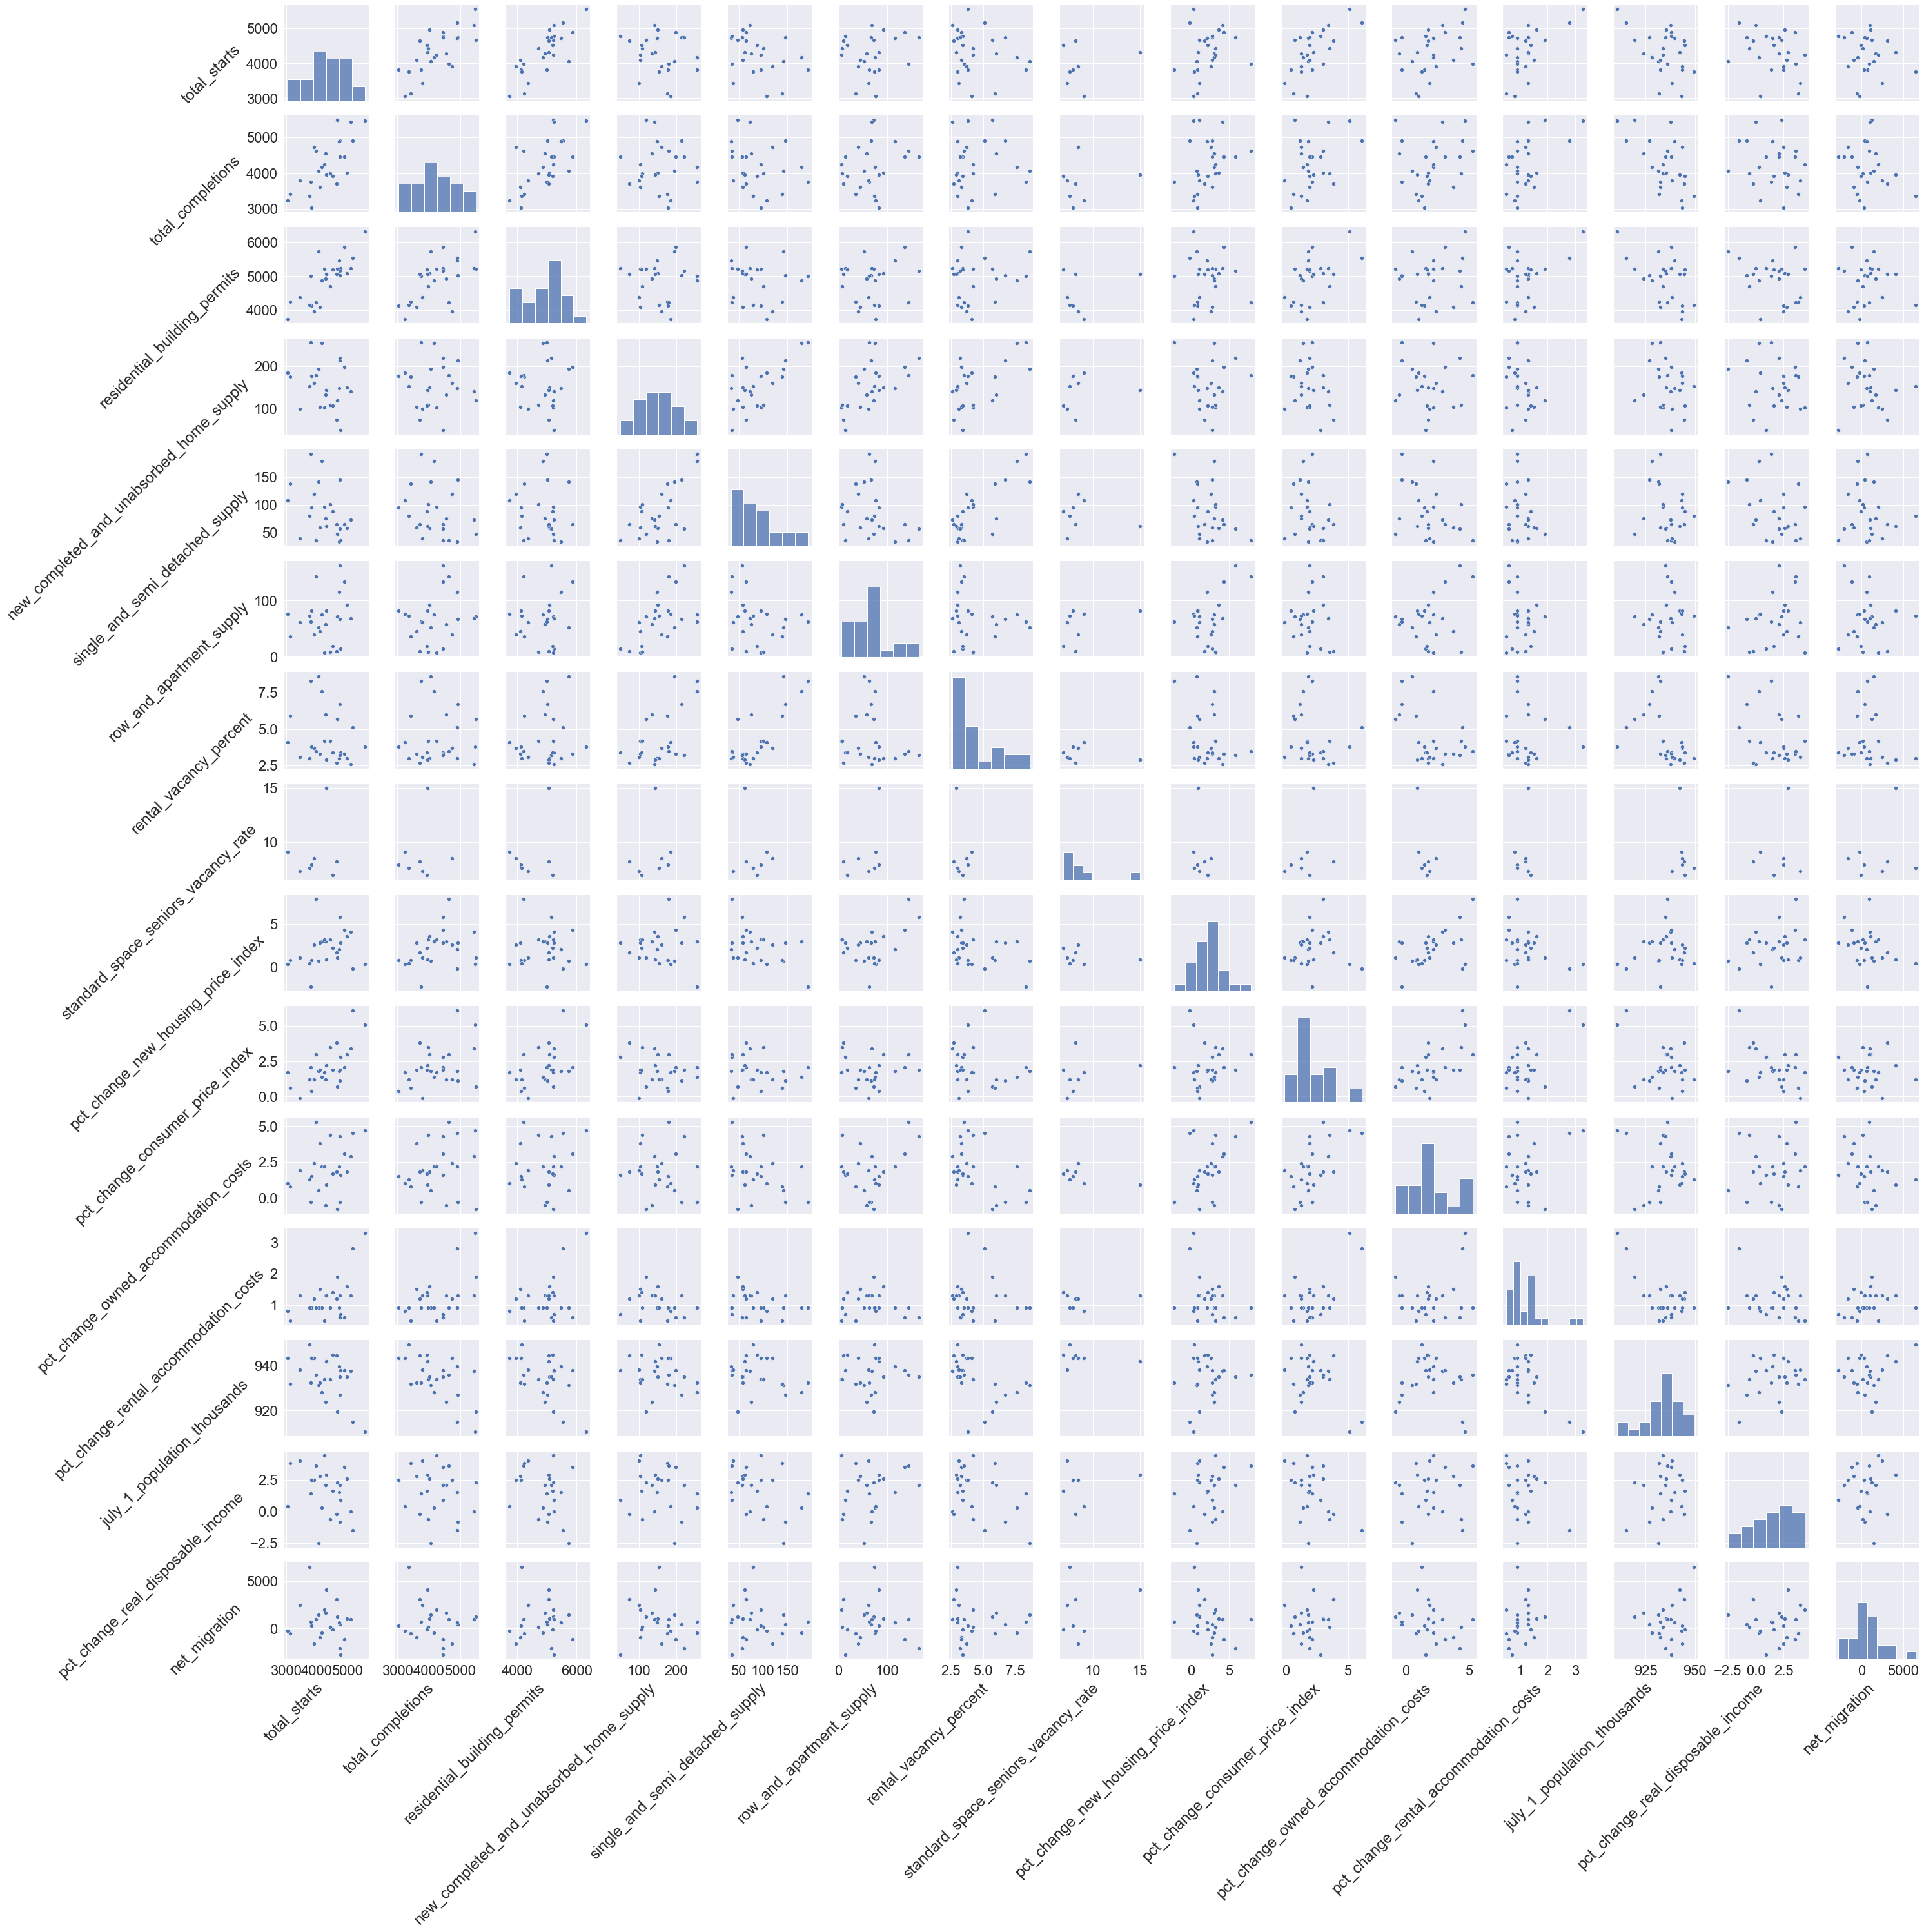

In [12]:
# Create a pair plot for the NS Housing Market Indicators
sns.set(font_scale=2)
pairNS = sns.pairplot(df)
for ax in pairNS.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    # set x labels alignment
    ax.xaxis.get_label().set_horizontalalignment('right')

Relationships worth exploring further are the July 1 population and the % rental vacancy. There is a cluster when population is high and vacancy rate is low, but then there seems to be a point where it changes to a linear relationship. A similar pattern exists between July 1 population and % change in rental costs. 

There may be a relationship between total starts and % change in consumer price index that is worth examining. It is a bit concerning, from a "housing is a human right" perspective that supply might be related to cost (i.e. profit) rather than demand.

# 07 Categorical plots

<AxesSubplot:xlabel='rental_vacancy_percent', ylabel='Count'>

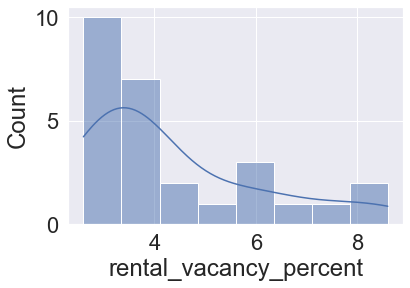

In [13]:
# View distribution of rental_vacancy_percent
sns.histplot(df['rental_vacancy_percent'], bins = 8, kde = True)

In [14]:
# Create low vacancy category
df.loc[(df['rental_vacancy_percent'] <= 3), 'vacancy_flag'] = 'Low Vacancy'

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_10496\1899847486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['rental_vacancy_percent'] <= 3), 'vacancy_flag'] = 'Low Vacancy'


In [15]:
# Set moderate vacancy flag
df.loc[((df['rental_vacancy_percent'] > 3) & (df['rental_vacancy_percent'] < 5)), 'vacancy_flag'] = 'Moderate Vacancy'

In [16]:
# Set high vacancy flag
df.loc[(df['rental_vacancy_percent'] >= 5), 'vacancy_flag'] = 'High Vacancy'

In [17]:
# View frequency count of each category
df['vacancy_flag'].value_counts()

Moderate Vacancy    13
High Vacancy         8
Low Vacancy          6
Name: vacancy_flag, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '910.5'),
  Text(1, 0, '915.0'),
  Text(2, 0, '919.5'),
  Text(3, 0, '923.9'),
  Text(4, 0, '926.9'),
  Text(5, 0, '928.1'),
  Text(6, 0, '931.3'),
  Text(7, 0, '931.8'),
  Text(8, 0, '932.4'),
  Text(9, 0, '932.5'),
  Text(10, 0, '933.8'),
  Text(11, 0, '935.1'),
  Text(12, 0, '935.2'),
  Text(13, 0, '935.9'),
  Text(14, 0, '937.7'),
  Text(15, 0, '937.9'),
  Text(16, 0, '938.2'),
  Text(17, 0, '939.6'),
  Text(18, 0, '942.1'),
  Text(19, 0, '943.3'),
  Text(20, 0, '943.4'),
  Text(21, 0, '943.5'),
  Text(22, 0, '944.5'),
  Text(23, 0, '944.9'),
  Text(24, 0, '949.5')])

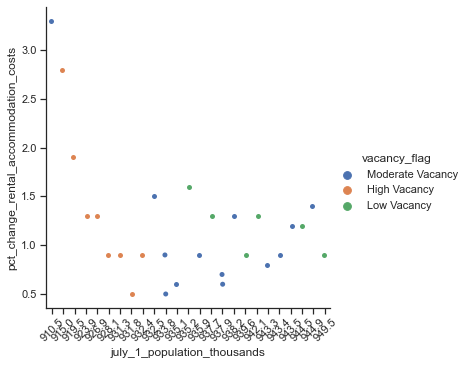

In [18]:
# Create a categorical plot
sns.set(style="ticks")
catHousing = sns.catplot(x="july_1_population_thousands", y="pct_change_rental_accommodation_costs", hue="vacancy_flag", data=df)
plt.xticks(rotation = 45)

When vacancy rates are high, there is an inverse linear relationship between population and percent change in rental accommodation costs. In other words, as population increases, percent change in accommodation costs decreases, but only if the rental vacancy rate is high.

# 08 Discussion

The questions relevant to this dataset that were posed in the exploratory analysis of the data preparation notebook are best answered once time series analysis has been undertaken.

New questions that have arisen from this exploratory analysis include:
- Does housing supply only correlate to other factors related to housing supply? Is there no correlation to population?
- Is there a lag between housing demand (higher population, lower availablity/supply) and new starts/new supply?
- To prevent a housing crisis, which variables should have strong correlations (positive or negative)?

**Hypothesis**: There is not a lag between housing demand and new supply.